# Robot path planning
 
 
In this exercise, we use the dynamic programming algorithm for robot path 
planning in a given environment. The environment is divided into cells as depicted 
in Figure 1. By convention:
 
* the robot takes 1  distance unit to move horizontally or vertically between 
adjacent nodes and $\sqrt{2}$ units to move diagonally.
* Distances to obstacle nodes are infinite.
* Distance between two diagonally adjacent nodes, adjacent to the same obstacle 
node is infinite.
 
The goals is to find the shortest path from cell A to cell B.

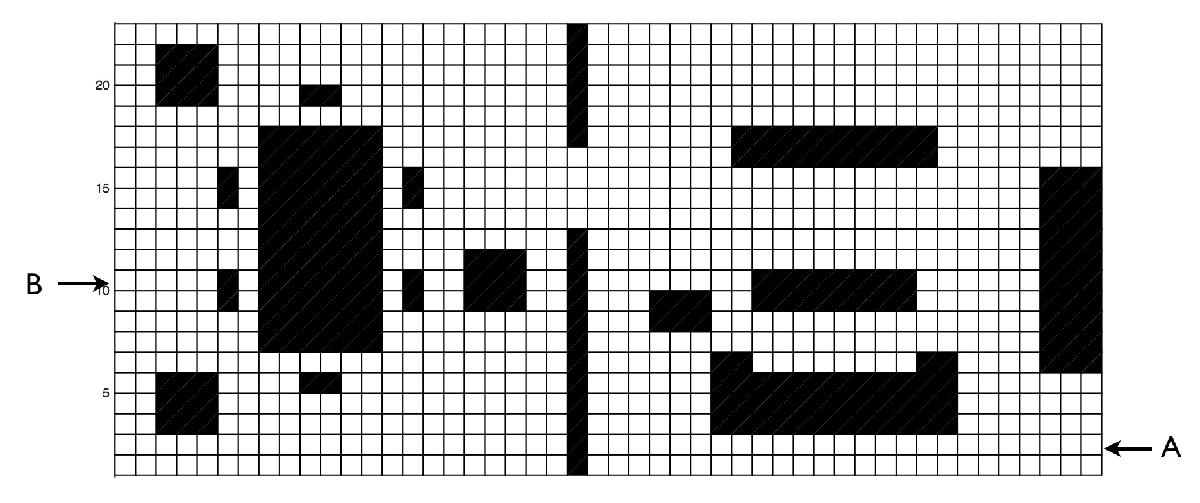
<center>Figure 1: Environment</center>
 
The following code allows to find such a path by computing the optimal policy: 
then the optimal path can be found by following the arrows from A to B. One 
can change the M matrix to find the optimal path in another environment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib ipympl

In [ ]:
def robotpathplanning(M, fnode):
    p, m = M.shape
    n = p*m
    # label nodes and save correspondence
    M2V = [ [[] for j in range(m)] for i in range(p) ]
    V2M = [ [] for j in range(n)]
    i = 0
    
    for r in range(p):
        for l in range(m):
            M2V[r][l] = i
            V2M[i] = [r, l]
            i +=1
    
    # Construct adjacency matrix
    E = np.Inf*np.ones((n,n))
   

    for i in range(n):
        E[i][i] = 0
        v = V2M[i]
        r = v[0]
        l = v[1]
    
        if M[r][l] == 1: # else it is an obstacle
            dr = [ 0 for j in range(8)]
            dl = [ 0 for j in range(8)]
        # divide between nodes in the border and interior nodes
            if r == 1-1 or r+1 == p or l == 1-1 or l+1 == m: # border
                if r == 1-1 or r+1 == p:
                    if r == 1-1:
                        deltar =  1
                    else:
                        deltar = -1
                
                    if l == 1-1:
                        dr[0] = deltar
                        dl[0] = 0
                        dr[1] = 0
                        dl[1] = 1
                        dr[2] = deltar
                        dl[2] = 1
                        nadj = 3
                    else:
                        if l+1 == m:
                            dr[0] = deltar
                            dl[0] = 0
                            dr[1] = 0
                            dl[1] = -1
                            dr[2] = deltar
                            dl[2] = -1
                            nadj  = 3
                        else:
                            dr[0] = deltar
                            dl[0] = 0
                            dr[1] = deltar
                            dl[1] = -1
                            dr[2] = deltar
                            dl[2] = 1
                            dr[3] = 0
                            dl[3] = 1
                            dr[4] = 0
                            dl[4] = -1
                            nadj  = 5
                else:
                    if l==1-1:
                        deltal = 1
                    else:
                        deltal = -1
                
                    dr[0] =  1
                    dl[0] = 0
                    dr[1] =  1
                    dl[1] = deltal
                    dr[2] =  0
                    dl[2] = deltal
                    dr[3] = -1
                    dl[3] = deltal
                    dr[4] = -1
                    dl[4] = 0
                    nadj = 5
            else:
            # test 8 adjacent nodes
                dr[0] =  0
                dl[0] =  1
                dr[1] =  0
                dl[1] = -1
                dr[2] =  1
                dl[2] =  0
                dr[3] = -1
                dl[3] =  0
                dr[4] =  1
                dl[4] =  1
                dr[5] =  1
                dl[5] = -1
                dr[6] = -1
                dl[6] =  1
                dr[7] = -1
                dl[7] = -1
                nadj = 8
        
            for ind in range(nadj):
                if M[r + dr[ind] ][l + dl[ind]] == 1:
                    if dr[ind] == 0 or dl[ind] == 0: # non-diagonal
                        dist = 1
                    else: # diagonal
                        if M[r][l+dl[ind]] == 1 & M[r+dr[ind]][l] == 1: # remove if cutting corner is allowed
                            dist = np.sqrt(2)
                        else:
                            dist = np.Inf
                    
                    E[i][M2V[r+dr[ind]][l+dl[ind]]] = dist
                    E[M2V[r+dr[ind]][l+dl[ind]]][i] = dist
    


    actionV, J_V, JV, uV = shortestpathDP(E, M2V[fnode[0][0]][fnode[1][0]])

    # convert to enviromnent coordinates
    J_ = [ [[] for j in range(m)] for i in range(p)]
    action = [ [[] for j in range(m)] for i in range(p)]
    for r in range(p):
        for l in range(m):
            if actionV[M2V[r][l]] != 0:
                aux = M2V[r][l]
                aux1 = int(actionV[aux].copy())
                a_ = V2M[aux1].copy()
                a_[0] += 1
                action[r][l] = a_
            else:
                action[r][l] = 0
            J_[r][l] = J_V[M2V[r][l]]
    return action, J_

In [ ]:
def plotpathplanning(J,M,u):

    p,m = M.shape
    deltapx = 0.2
    deltapy = 0.4

    grey = [ 0.7, 0.7, 0.7]
        
    f3 = plt.figure(3)
    ax3 = f3.gca()

    for r in range(p):
        for l in range(m):
            if M[r][l] == 0:
                plotsquare(l,r,grey,ax3)
            else:
                plotsquare(l,r,[ 1, 1, 1], ax3)
            

    ax3.set_xlim(1, m+1)
    ax3.set_ylim(1, p+1)
    
    f1 = plt.figure(1)
    ax1 = f1.gca()

    ax1.set_xlim(1, m+1)
    ax1.set_ylim(1, p+1)
    
    for r in range(p):
        for l in range(m):
            if M[r][l] == 0:
                plotsquare(l,r,grey,ax1)
            else:
                plotsquare(l,r,[ 1, 1, 1], ax1)
                ax1.text(l + deltapx, r + deltapy, "%0.2f"%J[r][l],fontsize=5)
            
    ax1.set_xlim(1, m+1)
    ax1.set_ylim(1, p+1)
    f2 = plt.figure(2)
    ax2 = f2.gca()

    for r in range(p):
        for l in range(m):
            if M[r][l] == 0:
                plotsquare(l,r,grey,ax2)                
            else:
                plotsquare(l,r,[ 1, 1, 1], ax2)
                aux = np.array2string(np.array(u[r][l])-np.array([r+1,l+1]))
                            
                if aux == np.array2string(np.array([-1, 1])): # yes
                    plotTriang([l+0.75,r+0.25], np.pi/4, ax2)
                    ax2.plot([l+0.25, l+0.75],[r+0.75, r+0.25],'k')
                if aux == np.array2string(np.array([-1, 0])):# yes
                    plotTriang([l+0.5,r+0.25],np.pi/2, ax2)
                    ax2.plot([l+0.5, l+0.5],[r+0.25, r+0.75],'k')
                if aux == np.array2string(np.array([-1, -1])):
                    plotTriang([l+0.25,r+0.25],3*np.pi/4, ax2)
                    ax2.plot([l+0.25, l+0.75],[r+0.25, r+0.75],'k')
                if aux == np.array2string(np.array([0, -1])):
                    plotTriang([l+0.25,r+0.5],np.pi, ax2)
                    ax2.plot([l+0.25, l+0.75],[r+0.5, r+0.5],'k')
                if aux == np.array2string(np.array([1, -1])):
                    plotTriang([l+0.25,r+0.75],-3*np.pi/4, ax2)
                    ax2.plot([l+0.25, l+0.75],[r+0.75, r+0.25],'k')
                if aux == np.array2string(np.array([1, 0])):
                    plotTriang([l+0.5,r+0.75],-np.pi/2, ax2)
                    ax2.plot([l+0.5, l+0.5],[r+0.25, r+0.75],'k')
                if aux == np.array2string(np.array([1, 1])):
                    plotTriang([l+0.75,r+0.75],-np.pi/4, ax2)
                    ax2.plot([l+0.25, l+0.75],[r+0.25, r+0.75],'k')
                if aux == np.array2string(np.array([0, 1])):
                    plotTriang([l+0.75,r+0.5],0, ax2)
                    ax2.plot([l+0.25, l+0.75],[r+0.5, r+0.5],'k')
    ax2.set_xlim(0, m+1)
    ax2.set_ylim(0, p+1)                
    plt.show()

In [ ]:
def plotTriang(p, theta, ax):
    d1 = 0.15
    d2 = 0.03
    p1 = p
    p2 = p + np.array([-d1 * np.cos(theta) - d2 * np.sin(theta), 
                       -d1 * -np.sin(theta) - d2 * np.cos(theta)])
    p3 = p + np.array([-d1 * np.cos(theta) + d2 * np.sin(theta), 
                       -d1 * -np.sin(theta) + d2 * np.cos(theta)])
    tri = patches.Polygon(np.vstack([p3, p2, p1]), 20, facecolor='g', edgecolor='k')
    ax.add_patch(tri)

In [ ]:
def plotsquare(l, r, c, ax):
    rect = patches.Rectangle((l, r), 1, 1, facecolor=c, edgecolor='k')
    ax.add_patch(rect)

In [ ]:
def shortestpathDP(E, fnode):

    n, n_col = E.shape
    J = np.zeros((n,n))
    for idx in range(n):
        J[idx, n-1] = np.Inf
    J[fnode, n-1] = 0
    action = np.zeros((n, 1))
    u = np.zeros((n, n-1))

    u_ = np.zeros((n,n-1))
    for k in range(n-1-1,-1,-1):
        for i in range(n):
            J[i,k] = np.min( E[i,:].T + J[:,k+1] )
            u_[i,k] = np.argmin(E[i,:].T + J[:,k+1] )
            if ~np.isinf( J[i,k] ):
                if E[i,i] + J[i,k+1] == J[i,k]:
                    u[i,k] = i
                else:
                    u[i,k] = u_[i,k];
                    action[i] = u[i,k]+1

    J_ = J[:,0]
    return action, J_, J, u

In [ ]:
M = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

action, J = robotpathplanning(np.array(M), [[0],[ 0]])
plotpathplanning(J,np.array(M),action)